Loading required package: forecast
Loading required package: fma
Loading required package: expsmooth
Loading required package: lmtest
Loading required package: zoo

Attaching package: ‘zoo’

The following objects are masked from ‘package:base’:

    as.Date, as.Date.numeric

Loading required package: tseries

Attaching package: ‘lubridate’

The following object is masked from ‘package:base’:

    date


Attaching package: ‘PerformanceAnalytics’

The following object is masked from ‘package:graphics’:

    legend

Version 0.4-0 included new data defaults. See ?getSymbols.
── Attaching packages ─────────────────────────────────────── tidyverse 1.2.1 ──
✔ ggplot2 3.2.0     ✔ purrr   0.3.2
✔ tibble  2.1.3     ✔ dplyr   0.8.3
✔ tidyr   0.8.3     ✔ stringr 1.2.0
✔ readr   1.3.1     ✔ forcats 0.4.0
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ lubridate::as.difftime() masks base::as.difftime()
✖ lubridate::date()        masks base::date()
✖ dplyr::filter()

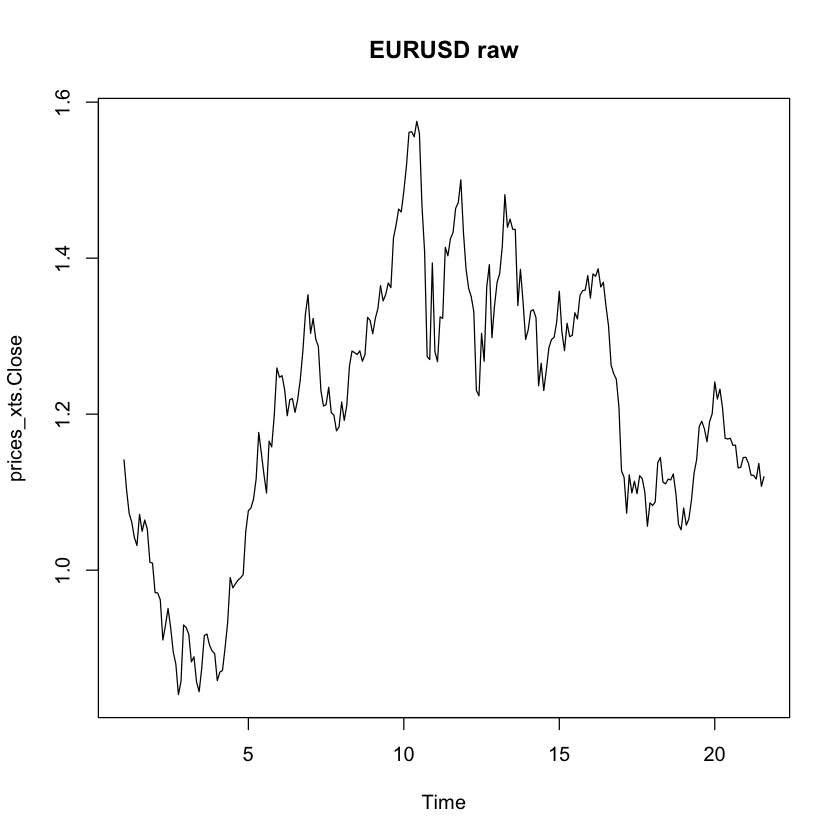

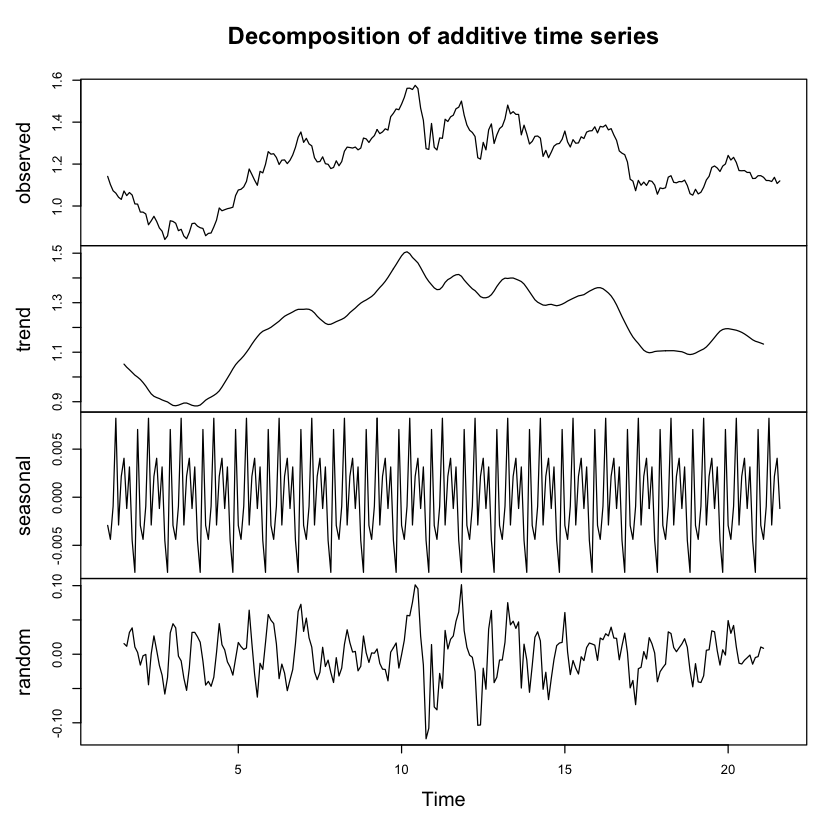

In [4]:
# Try to decompose EURUSD prices
library(fpp)
library(xts)

# Get EURUSD data
DATA_FOLDER <- '~/Resilio Sync/FXBootcamp/'

source(paste0(DATA_FOLDER,'/Code/tools/r-tools/data-utils.R'))
prices_df <- get_daily_OHLC('EURUSD')

prices_xts <- xts(prices_df$Close, order.by = prices_df$Date)
colnames(prices_xts) <- 'Close'
prices_monthly <- to.monthly(prices_xts)[,4] # Just get close
prices_ts <- ts(prices_monthly, frequency = 12) # frequency = 12 is monthly
plot(prices_ts, main = 'EURUSD raw')

# Decomposed using moving averages
eurusd_decomposed <- decompose(prices_ts, "additive")
plot(eurusd_decomposed)

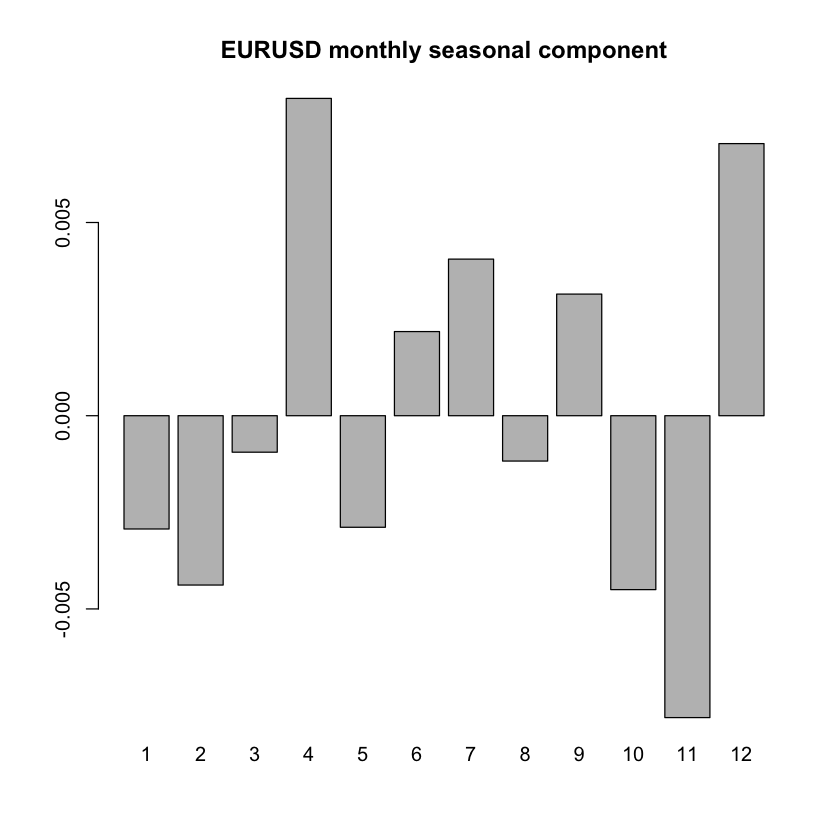

In [5]:
# Plot seasonal component for each month
sp <- eurusd_decomposed$seasonal[1:12]
barplot(sp, names.arg = 1:12, main = 'EURUSD monthly seasonal component')